## Linear Regression: Review

The Boston Housing example.

| CRIM  |ZN |INDUS|CHAS| NOX | RM  |AGE | DIS |RAD|TAX|PTRATIO|  B  |LSTAT|price|
|------:|--:|----:|---:|----:|----:|---:|----:|--:|--:|------:|----:|----:|----:|
|0.00632| 18| 2.31|   0|0.538|6.575|65.2|4.090|  1|296|   15.3|396.9| 4.98| 24.0|
|0.02731|  0| 7.07|   0|0.469|6.421|78.9|4.967|  2|242|   17.8|396.9| 9.14| 21.6|
|0.02729|  0| 7.07|   0|0.469|7.185|61.1|4.967|  2|242|   17.8|392.8| 4.03| 34.7|
|0.03237|  0| 2.18|   0|0.458|6.998|45.8|6.062|  3|222|   18.7|394.6| 2.94| 33.4|
|0.06905|  0| 2.18|   0|0.458|7.147|54.2|6.062|  3|222|   18.7|396.9| 5.33| 36.2|

In [1]:
%matplotlib inline
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.preprocessing import StandardScaler

In [2]:
warnings.filterwarnings('ignore')

In [3]:
boston = load_boston()

In [4]:
X = boston.data
y = boston.target

In [5]:
bdf = pd.DataFrame(X, columns=boston.feature_names)
bdf['price'] = y

In [6]:
#fitting a scikitlearn model
lr = LinearRegression()
lr.fit(bdf[['LSTAT']], y)
prds= lr.predict(bdf[['LSTAT']])

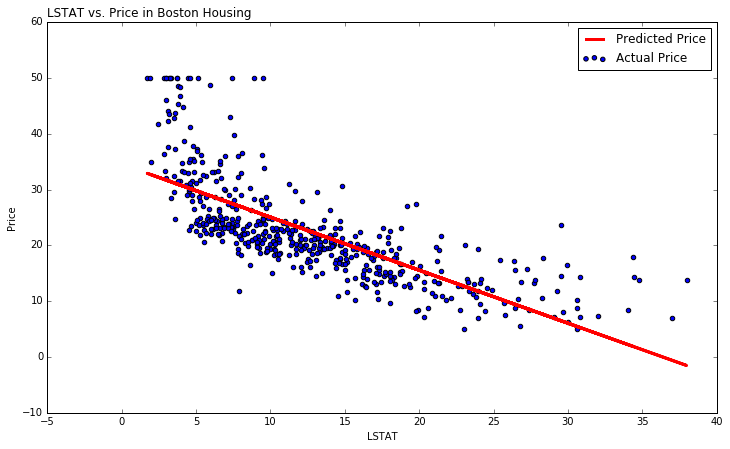

In [7]:
#making a plot
plt.figure(figsize = (12, 7))
plt.scatter(bdf.LSTAT, bdf.price, label = 'Actual Price')
plt.plot(bdf.LSTAT, prds, color = 'red', linewidth = 3, label = 'Predicted Price')
plt.title('LSTAT vs. Price in Boston Housing', loc = 'left')
plt.xlabel('LSTAT')
plt.ylabel('Price')
plt.legend(frameon = 'false')
plt.savefig('presentation/img1.png')

## Model Expression

$$w_{LS} = (X^TX)^{-1}X^Ty$$



In [8]:
#calculate product inside parenthesis
xtx = X.T@X

In [9]:
#find inverse
inv = np.linalg.inv(xtx)

In [10]:
#compute weights
wLS = inv@X.T@y

## Writing a Function

```
take in X and y

compute xtx

compute inverse

compute weights

return weights
```

In [11]:
def wLS(X, y):
    '''
    This function provides an 
    ordinary least squares fit of a dataset X on 
    a target variable y.
    ----
    X = input array of feature variables
    y = target array of feature variables
    returns 
    array of weights for basic linear regression
    '''
    #check dimensions
    if X.shape[0] < X.shape[1]:
        X = X.T
    #calculate product inside parenthesis
    xtx = X.T@X
    #find inverse
    inv = np.linalg.inv(xtx)
    #compute weights
    prod = inv@X.T
    wLS = prod@y
    return wLS

In [12]:
wLS(X, y)

array([-9.16297843e-02,  4.86751203e-02, -3.77930006e-03,  2.85636751e+00,
       -2.88077933e+00,  5.92521432e+00, -7.22447929e-03, -9.67995240e-01,
        1.70443393e-01, -9.38925373e-03, -3.92425680e-01,  1.49832102e-02,
       -4.16972624e-01])

## Classes in Python

```python
class ClassName:
    <statement-1>
    .
    .
    .
    <statement-N>
```

```python
class MyClass:
    """A simple example class"""
    i = 12345

    def f(self):
        return 'hello world'
```

In [13]:
class MyClass:
    """A simple example class"""
    i = 12345

    def f(self):
        return 'hello world'
#create an instance
class1 = MyClass()

In [14]:
#use our method
class1.f()

'hello world'

### `__init__ ` and `self`

From the Python docs:


<div class="alert alert-info" role="alert">
The instantiation operation (“calling” a class object) creates an empty object. Many classes like to create objects with instances customized to a specific initial state. Therefore a class may define a special method named __init__(), like this:
<br> 
 
```
def __init__(self):
    self.data = []
```
</div>

```python
class Complex:
    def __init__(self, realpart, imagpart):
        self.r = realpart
        self.i = imagpart

x = Complex(3.0, -4.5)
x.r, x.i
```

In [15]:
class Complex:
    '''
    This is a simple class that will 
    return a complex number object.
    '''
    def __init__(self, realpart, imagpart):
        self.r = realpart
        self.i = imagpart

x = Complex(3.0, -4.5)
x.r, x.i

(3.0, -4.5)

In [16]:
#a different class instance
x2 = Complex(2.3, 5.6)

In [17]:
#another class instance
x2.r, x2.i

(2.3, 5.6)

## Our Regression Class

```python
class Regression:
    '''
    This class contains basic linear
    regression capabilities.  
    - OLS fit a linear regression model
    - make predictions with the model
    '''
    def __init__(self, coefs_, intercept_):
        self.coefs_ = None
        self.intercept = None
        
    def OLS(self, X, y)
        ...
        self.coefs_ = wLS
        return wLS
    
    def predict(self, X):
        return predictions
```
    
    
    
    



In [18]:
class Regression:
    
    def __init__(self, fit_intercept = True):
        self.coefs_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
        
    
    def OLS(self, X, y):
        '''
        This function provides an 
        ordinary least squares fit of a dataset X on 
        a target variable y.
        ----
        X = input array of feature variables
        y = target array of feature variables
        returns 
        array of weights for basic linear regression
        '''
        # Check shapes of input matricies. 
        if X.shape[0] < X.shape[1]:
            X = X.T
        if y.shape[0] < y.shape[1]:
            y = y.T
            
        # Prepend ones to x matrix
        if self._fit_intercept:
            ones = np.ones((len(y), 1), dtype=int)
            X = np.concatenate((ones, X), axis=1)
        else:
            X = X
        # fit the model
        xtx = X.T@X
        inv = np.linalg.inv(xtx)
        w_ls = inv@X.T@y
        # add intercepts and coefs
        self.intercept_ = w_ls[:1]
        self.coefs_ = w_ls[1:]
        return w_ls


In [19]:
#some test cases
lr = Regression()

In [20]:
X = np.array([[0, 2], [3, 7], [5, 9], [3.4,6]])
y = np.array([[2.1, 3.2, 4, 5.6]])

In [21]:
lr.OLS(X, y)

array([[ 5.3       ],
       [ 2.41150442],
       [-1.4079646 ]])

In [22]:
#model without intercept
lr2 = Regression(fit_intercept=False)

In [23]:
lr2.OLS(X, y)

array([[-0.1530117],
       [ 0.6436483]])

### Predict

$$\hat{y} = \beta_0 + X\beta_i$$



```python
def predict(self, X):
    return self.intercept_ + X@self.coef_
```

In [24]:
del(Regression)

In [25]:
class Regression:
    
    def __init__(self, fit_intercept = True):
        self.coefs_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
        
    
    def wLS(self, X, y):
        '''
        This function provides an 
        ordinary least squares fit of a dataset X on 
        a target variable y.
        ----
        X = input array of feature variables
        y = target array of feature variables
        returns 
        array of weights for basic linear regression
        '''
        # Check shapes of input matricies. 
        if X.shape[0] < X.shape[1]:
            X = X.T
        try:
            if y.shape[0] < y.shape[1]:
                y = y.T
        except:
            pass
        # Prepend ones to x matrix
        if self._fit_intercept:
            ones = np.ones((len(y), 1), dtype=int)
            X = np.concatenate((ones, X), axis=1)
        else:
            X = X
        # fit the model
        xtx = X.T@X
        inv = np.linalg.inv(xtx)
        w_ls = inv@X.T@y
        # add intercepts and coefs
        self.intercept_ = w_ls[0]
        self.coefs_ = w_ls[1:]
        return w_ls
    
    def predict(self, X):
        return self.intercept_ + X@self.coefs_


In [26]:
del(lr)

In [27]:
lr = Regression()
lr.wLS(X, y)

array([[ 5.3       ],
       [ 2.41150442],
       [-1.4079646 ]])

In [28]:
lr.coefs_

array([[ 2.41150442],
       [-1.4079646 ]])

In [29]:
lr.intercept_

array([5.3])

In [30]:
lr.predict(X)

array([[2.4840708 ],
       [2.67876106],
       [4.68584071],
       [5.05132743]])

In [31]:
#testing on bigger data
X = boston.data
y = boston.target

In [32]:
bos_reg = Regression()

In [33]:
bos_reg.wLS(X, y)

array([ 3.64911033e+01, -1.07170557e-01,  4.63952195e-02,  2.08602395e-02,
        2.68856140e+00, -1.77957587e+01,  3.80475246e+00,  7.51061703e-04,
       -1.47575880e+00,  3.05655038e-01, -1.23293463e-02, -9.53463555e-01,
        9.39251272e-03, -5.25466633e-01])

### Error

**Sum of squared error**: $\sum_{i = 1}^n (\hat{y} - y_i)^2$

**Total sum of squared error**: $\sum_{i = 1}^n (\bar{y} - y_i)^2$

**r$^2$** = $1 - \frac{sse}{tss}$

**Mean Squared Error**: $\frac{1}{n} \sum_{i = 1}^n (\hat{y} - y_i)^2$

In [34]:
def r2(actual_y, predicted_y):
    sse = np.sum((predicted_y - actual_y)**2)
    tse = np.sum((actual_y - np.mean(actual_y))**2)
    return 1 - sse/tse

In [35]:
def mse(actual_y, predicted_y):
    return np.mean((actual_y - predicted_y)**2)

In [36]:
class Metrics:
    
    def __init__(self, X, y, model):
        self.data = X
        self.target = y
        self.model = model
        
    def r2(self):
        squared_errors = (self.target - self.model.predict(self.data))**2
        sse = np.sum(squared_errors)
        tse = np.sum((self.target - np.mean(self.target))**2)
        return 1 - sse/tse
    
    def mse(self):
        return np.mean((self.target - self.model.predict(self.data))**2)
    
    def rmse(self):
        return self.mse()**0.5
    
    def summary_printed(self):
        print('The r2 score is {:.4}\nThe Mean Squared Error is {:.4}\nand the RMSE is {:.4}'.format(self.r2(), self.mse(), self.rmse()))
        

In [37]:
lr = Regression()
lr.wLS(X, y)
performance = Metrics(X, y, lr)

In [38]:
performance.summary_printed()

The r2 score is 0.7406
The Mean Squared Error is 21.9
and the RMSE is 4.68


$$ y = mx + b$$

### Polynomial Features

$$ y = a + bx_i + cx_i^2 $$



In [39]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

### sklearn pipelines

In [40]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

In [41]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [42]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

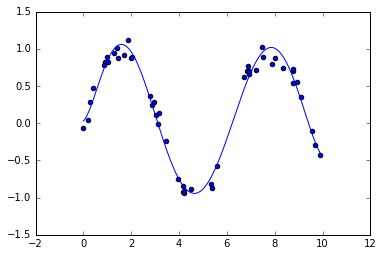

In [43]:
#fitting a high order polynomial to sin with noise
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

### Any Basis

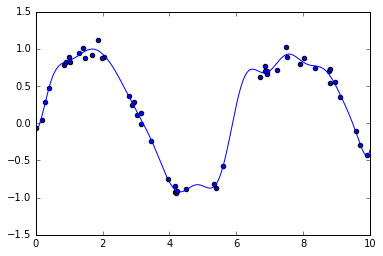

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

#a class for generating features from gaussian basis
class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

## Regularization

![](https://upload.wikimedia.org/wikipedia/commons/b/bd/Tychonoff.jpg)
> "Tikhonov regularization, named for Andrey Tikhonov, is the most commonly used method of regularization of ill-posed problems. In statistics, the method is known as ridge regression, in machine learning it is known as weight decay, and with multiple independent discoveries, it is also variously known as the Tikhonov–Miller method, the Phillips–Twomey method, the constrained linear inversion method, and the method of linear regularization. It is related to the Levenberg–Marquardt algorithm for non-linear least-squares problems."

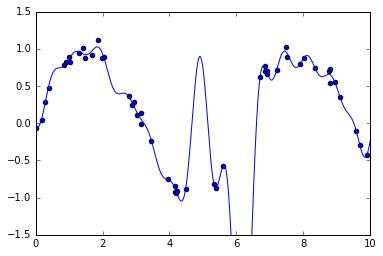

In [45]:
#projecting 30 gaussian basis
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

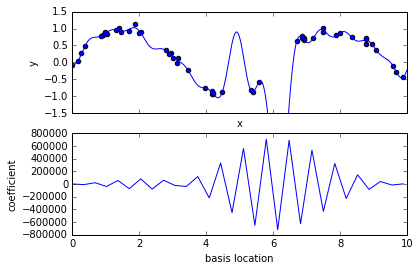

In [46]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

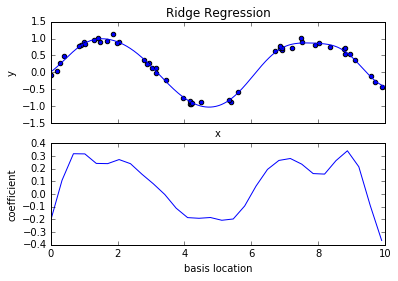

In [47]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

### Intuition

![](images/reg.png)

### Mathematics

$$\displaystyle \hat{\beta}^{ridge} = (X^TX + \lambda I)^{-1}X^Ty$$

In [48]:
from sklearn.datasets import load_boston
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import BayesianRidge
X = boston.data
y  = boston.target

In [49]:
def ridge(X, y, alpha):
    partI = (alpha*np.eye(X.shape[1]) + X.T@X)
    inv = np.linalg.inv(partI)
    wrr = inv@X.T@y
    return wrr

In [50]:
ridge(X, y, 0.1)

array([-9.15985441e-02,  4.87139425e-02, -4.45793714e-03,  2.84556259e+00,
       -2.74153675e+00,  5.91739732e+00, -7.32766661e-03, -9.66802201e-01,
        1.70527148e-01, -9.41761788e-03, -3.92158577e-01,  1.49770969e-02,
       -4.17733264e-01])

### The `sklearn` way

In [51]:
from sklearn.linear_model import Ridge

In [52]:
Ridge(alpha = 0.1).fit(X, y).coef_

array([-1.06611925e-01,  4.65458459e-02,  1.62933780e-02,  2.67184923e+00,
       -1.67117124e+01,  3.81317732e+00, -2.12192713e-04, -1.45977310e+00,
        3.03105310e-01, -1.24154673e-02, -9.41449131e-01,  9.44881364e-03,
       -5.26677896e-01])

In [53]:
pipe = make_pipeline(StandardScaler(), Ridge())

In [54]:
params = {'ridge__alpha': [0.1, 1.0, 4.0, 10, 100]}

In [55]:
grid = GridSearchCV(pipe, param_grid=params, cv = 5)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [57]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'ridge__alpha': [0.1, 1.0, 4.0, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
br = BayesianRidge()
pipe = make_pipeline(StandardScaler(), br)
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('bayesianridge', BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False))])

In [59]:
bayes_pred = pipe.predict(X_test)

In [60]:
pipe.score(X_test, y_test)

0.6948722570037364

In [61]:
br.alpha_

0.04783232979777636

In [62]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [63]:
best = grid.best_estimator_

In [64]:
best.named_steps

{'ridge': Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001),
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [65]:
from sklearn.dummy import DummyRegressor

In [66]:
dum = DummyRegressor()
dum.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [68]:
from sklearn.linear_model import Lasso

In [69]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

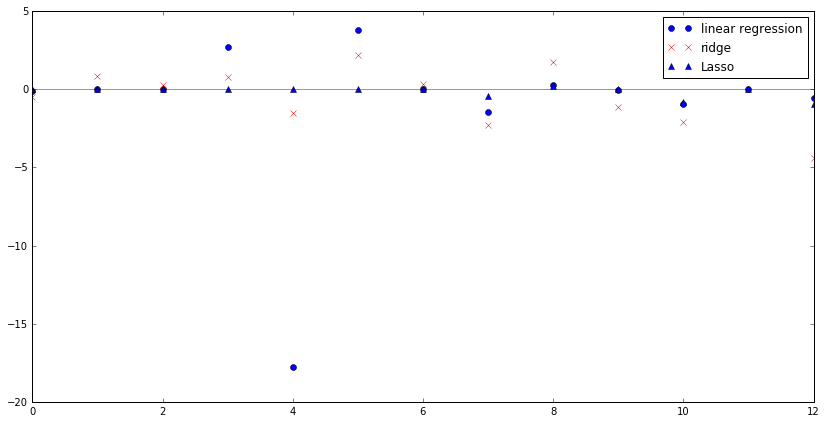

In [72]:
plt.figure(figsize = (14, 7))
plt.plot(lr.coefs_, 'bo', label = 'linear regression')
plt.plot(best.named_steps['ridge'].coef_, 'rx', label = 'ridge')
plt.plot(lasso.coef_, '^', label = 'Lasso')
plt.axhline(color = 'black', alpha = 0.4)
plt.legend()

### Further Reading

- Blog post on writing Machine Learning classes in Python: https://dziganto.github.io/classes/data%20science/linear%20regression/machine%20learning/object-oriented%20programming/python/Understanding-Object-Oriented-Programming-Through-Machine-Learning/

- The Python Data Science Handbook, *Linear Regression in Depth*: https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

- The Elements of Statistical Learning (see chapter 3): https://web.stanford.edu/~hastie/ElemStatLearn/

- Andrew Ng on Regularized Methods: https://www.youtube.com/watch?v=u73PU6Qwl1I